In [1]:
!pwd

/home/pierre/scVI/tests/notebooks


In [35]:
import sys
sys.path.append('/home/pierre/scVI/ppc')
import pandas as pd
import seaborn as sns
sns.set()

from model_eval import ModelEval, outlier_metric
from metrics import *

from scvi.inference.inference import UnsupervisedTrainer
from scvi.dataset import CortexDataset, RetinaDataset, HematoDataset, PbmcDataset, \
    BrainSmallDataset
from scvi.models import VAE

In [2]:
USE_BATCHES = False
MY_DATASET = CortexDataset()
N_EXPERIMENTS = 20
N_EPOCHS = 120
N_LL_MC_SAMPLES = 25
MY_METRICS = [
    ('ll', LikelihoodMetric(trainer=None, n_mc_samples=N_LL_MC_SAMPLES)),
    ('imputation', ImputationMetric(trainer=None)),
    ('t_dropout', SummaryStatsMetric(trainer=None, stat_name='tstat', phi_name='dropout')),
    ('t_cv', SummaryStatsMetric(trainer=None, stat_name='tstat', phi_name='cv')),
]

File data/expression.bin already downloaded
Preprocessing Cortex data
Finished preprocessing Cortex data


training: 100%|██████████| 120/120 [00:19<00:00,  6.17it/s]

Median of Median: 2.5233
Mean of Median for each cell: 3.5855
training: 100%|██████████| 120/120 [00:19<00:00,  6.11it/s]

Median of Median: 3.3165
Mean of Median for each cell: 4.9343
training: 100%|██████████| 120/120 [00:19<00:00,  6.06it/s]

Median of Median: 3.2636
Mean of Median for each cell: 4.5789
training: 100%|██████████| 120/120 [00:19<00:00,  6.22it/s]

Median of Median: 2.2059
Mean of Median for each cell: 3.1981
training: 100%|██████████| 120/120 [00:22<00:00,  5.88it/s]

Median of Median: 2.6131
Mean of Median for each cell: 3.6677
training: 100%|██████████| 120/120 [00:21<00:00,  4.79it/s]

Median of Median: 2.4657
Mean of Median for each cell: 3.4151
training: 100%|██████████| 120/120 [00:20<00:00,  6.10it/s]

Median of Median: 3.0647
Mean of Median for each cell: 4.5217
training: 100%|██████████| 120/120 [00:20<00:00,  5.79it/s]

Median of Median: 2.9495
Mean of Median for each cell: 4.1673
training: 100%|█

/home/pierre/miniconda3/envs/scvi/lib/python3.6/site-packages/matplotlib-3.0.3-py3.6-linux-x86_64.egg/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


training: 100%|██████████| 120/120 [00:19<00:00,  5.94it/s]

Median of Median: 3.2262
Mean of Median for each cell: 4.7346
training: 100%|██████████| 120/120 [00:18<00:00,  6.42it/s]

Median of Median: 4.2297
Mean of Median for each cell: 6.1525
training: 100%|██████████| 120/120 [00:19<00:00,  6.40it/s]

Median of Median: 5.2153
Mean of Median for each cell: 8.3137
training: 100%|██████████| 120/120 [00:19<00:00,  5.73it/s]

Median of Median: 2.4659
Mean of Median for each cell: 3.4481
training: 100%|██████████| 120/120 [00:19<00:00,  5.85it/s]

Median of Median: 2.4446
Mean of Median for each cell: 3.5063
training: 100%|██████████| 120/120 [00:18<00:00,  6.42it/s]

Median of Median: 2.3385
Mean of Median for each cell: 3.3323
training: 100%|██████████| 120/120 [00:18<00:00,  6.57it/s]

Median of Median: 2.4675
Mean of Median for each cell: 3.4681
training: 100%|██████████| 120/120 [00:18<00:00,  6.50it/s]

Median of Median: 2.5039
Mean of Median for each cell: 3.4826
training: 100%|█

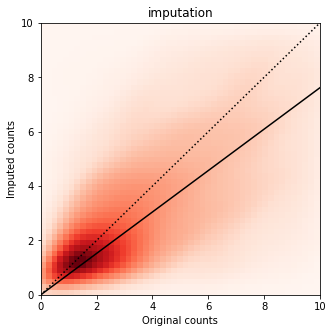

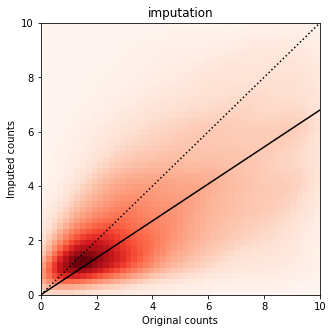

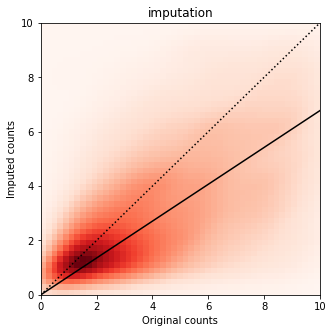

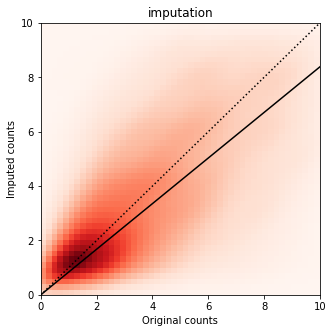

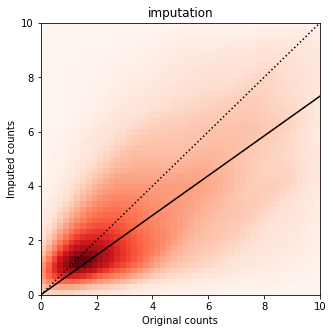

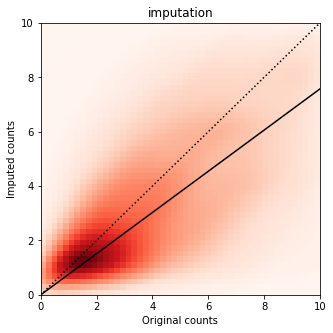

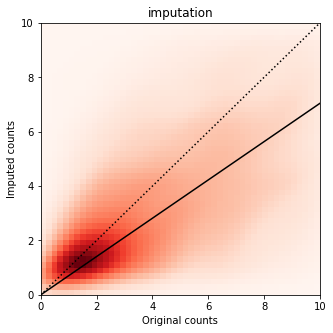

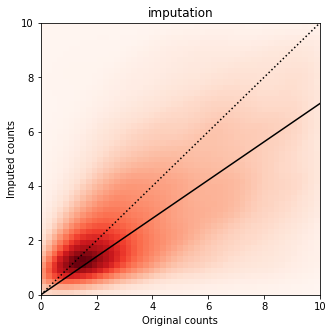

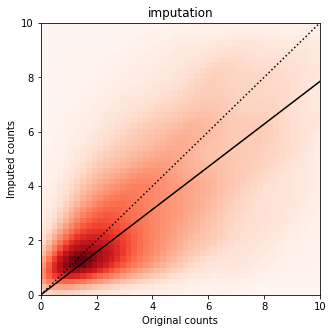

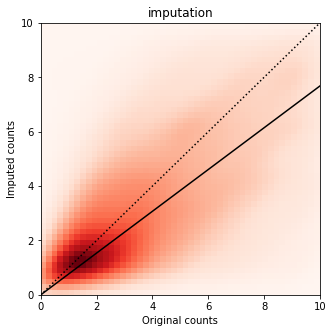

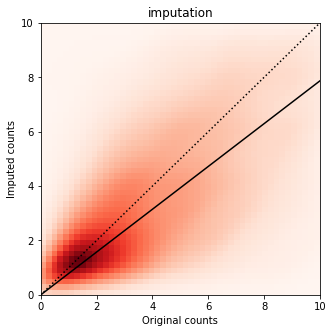

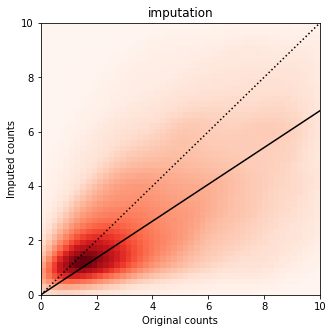

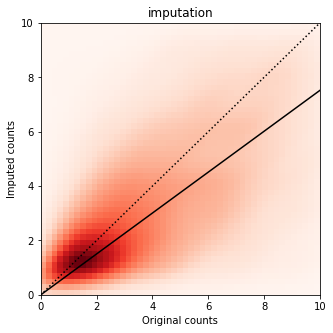

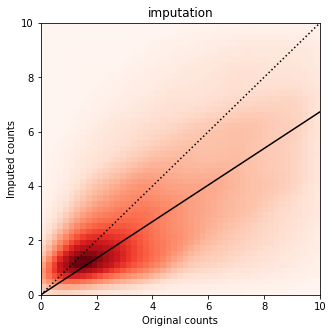

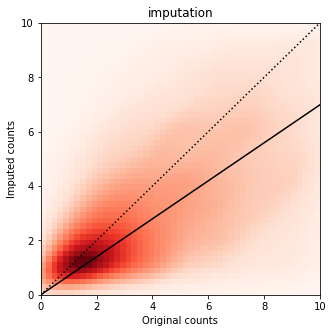

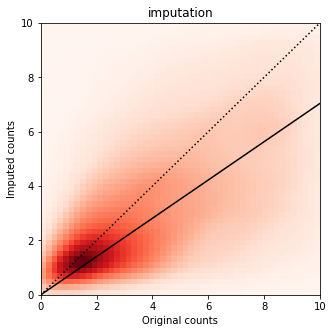

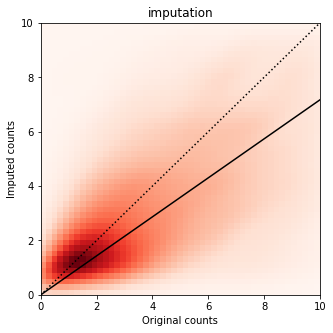

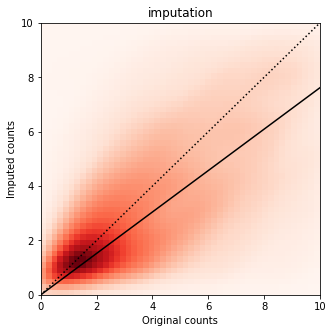

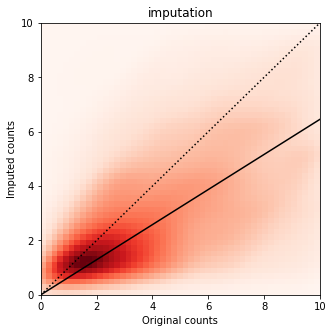

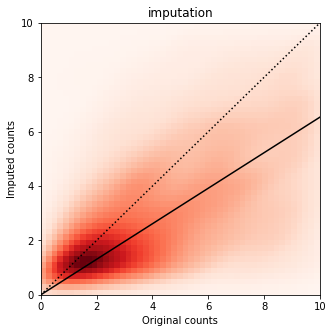

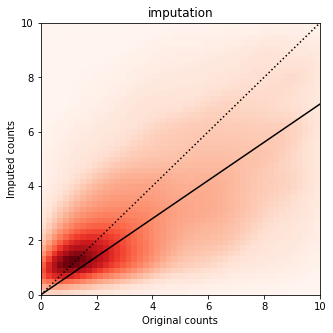

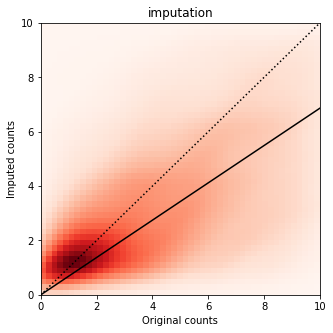

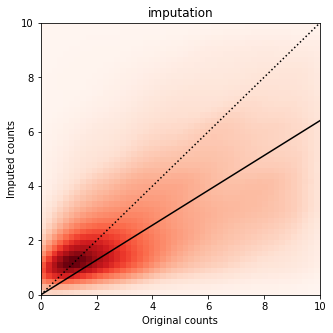

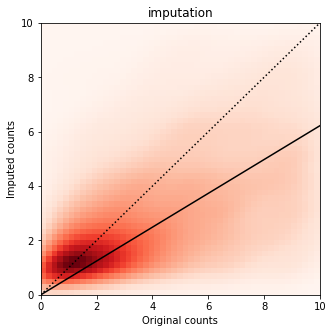

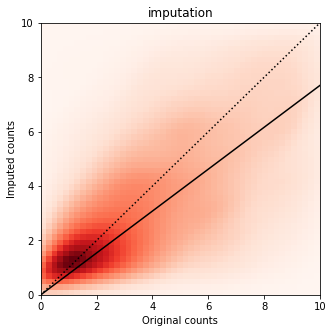

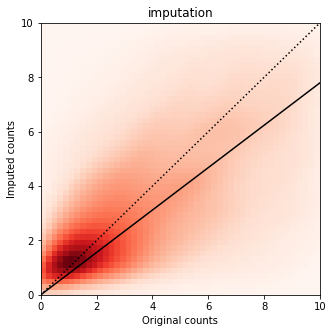

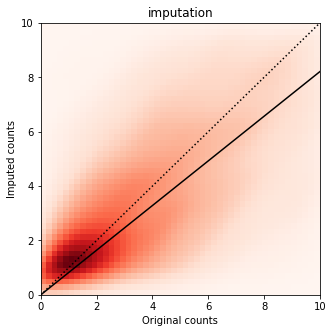

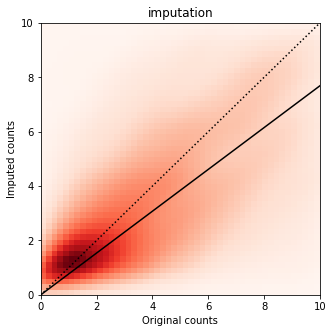

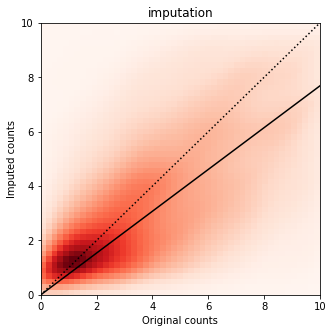

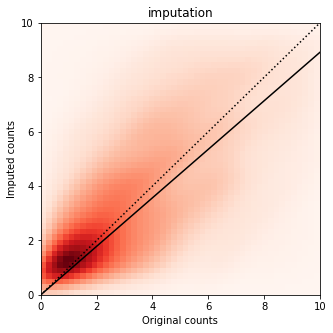

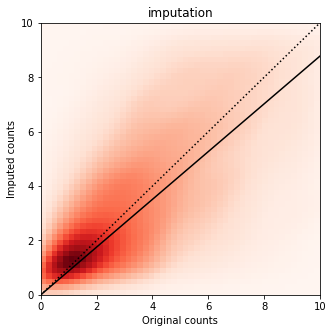

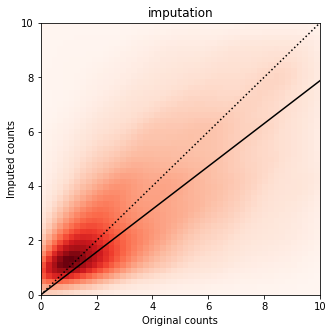

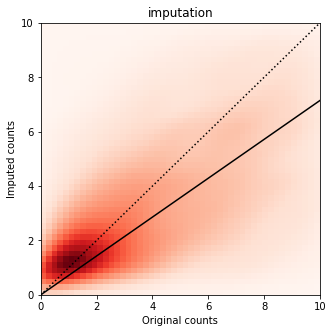

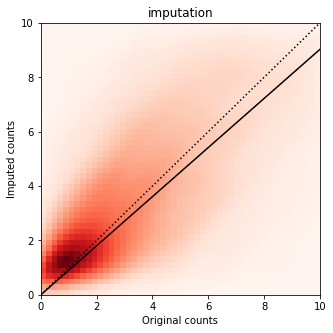

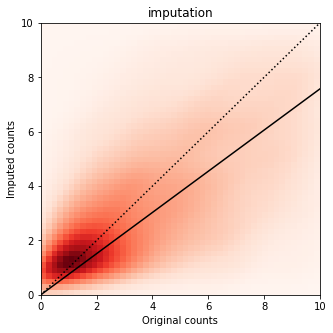

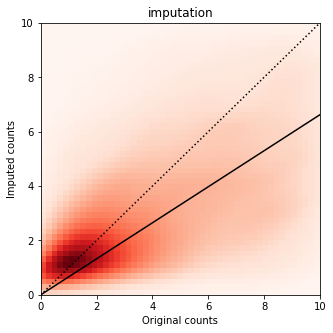

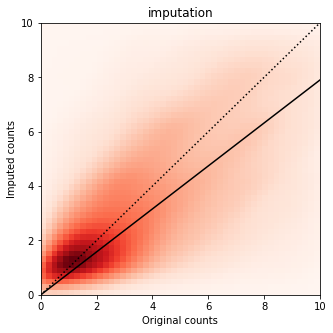

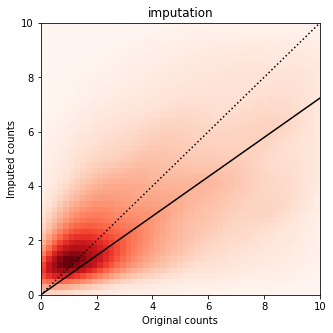

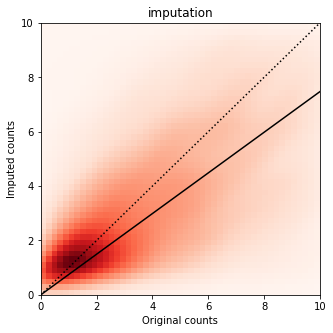

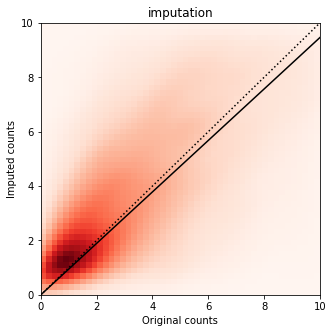

In [3]:
def my_model_fn(reconstruction_loss='zinb'):
    return VAE(MY_DATASET.nb_genes, n_batch=MY_DATASET.n_batches * USE_BATCHES,
               dropout_rate=0.2, reconstruction_loss=reconstruction_loss)

def zinb_model():
    return my_model_fn('zinb')

zinb_eval = ModelEval(model_fn=zinb_model,
                      dataset=MY_DATASET,
                      metrics=MY_METRICS)
zinb_eval.multi_train(n_experiments=N_EXPERIMENTS, n_epochs=N_EPOCHS, corruption='uniform')

def nb_model():
    return my_model_fn('nb')

nb_eval = ModelEval(model_fn=nb_model,
                    dataset=MY_DATASET,
                    metrics=MY_METRICS)
nb_eval.multi_train(n_experiments=N_EXPERIMENTS, n_epochs=N_EPOCHS, corruption='uniform')

In [32]:
zinb_df = zinb_eval.res_data
nb_df = nb_eval.res_data
all_df = nb_df.join(zinb_df, how='outer', lsuffix='_nb', rsuffix='_zinb')
nb_df.to_csv('/home/pierre/scVI/results/0416/cortex_results.csv', sep='\t')
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 12 columns):
imputation_median_imputation_score_nb      20 non-null float64
ll_ll_nb                                   20 non-null float64
t_cv_pvals_nb                              20 non-null object
t_cv_stat_phi_nb                           20 non-null object
t_dropout_pvals_nb                         20 non-null object
t_dropout_stat_phi_nb                      20 non-null object
imputation_median_imputation_score_zinb    20 non-null float64
ll_ll_zinb                                 20 non-null float64
t_cv_pvals_zinb                            20 non-null object
t_cv_stat_phi_zinb                         20 non-null object
t_dropout_pvals_zinb                       20 non-null object
t_dropout_stat_phi_zinb                    20 non-null object
dtypes: float64(4), object(8)
memory usage: 2.7+ KB


# I. Imputation & Likelihood

## Likelihood

In [41]:
from statsmodels.stats.weightstats import ttest_ind

In [43]:
tstat, pval, _ = ttest_ind(all_df.ll_ll_zinb, all_df.ll_ll_nb, alternative='smaller')
print(pval)

0.5273057135516273


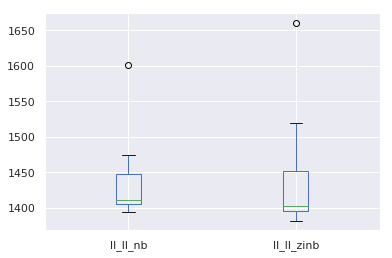

In [36]:
all_df[['ll_ll_nb', 'll_ll_zinb']].plot.box()

We cannot conclude to whether ZINB beats NB by comparing log-likelihoods

# II. PPC

In [ ]:
def statistic_metric(subdf, stats_key=None):
    ser = subdf[stats_key]
    ser = ser.mean(axis=1)
    
    return 

# III. Outlier Statistics

In [55]:
outliers_df = all_df.apply(outlier_metric, axis=1,
                pvals_keys=['t_dropout_pvals_zinb', 't_dropout_pvals_nb']).rename(columns={0: 'good_zinb_bad_nb', 1: 'good_nb_bad_zinb'})

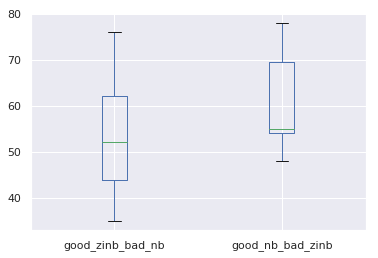

In [56]:
outliers_df.plot.box()

In [57]:
outliers_df.describe()

,good_zinb_bad_nb,good_nb_bad_zinb
count,20.000000,20.000000
mean,53.300000,60.300000
std,11.617138,9.931873
min,35.000000,48.000000
25%,43.750000,54.000000
50%,52.000000,55.000000
75%,62.000000,69.500000
max,76.000000,78.000000


Not very conclusive as we have a very small number of points considered and as distributions' points of interest are very close